In [ ]:
!nvidia-smi

Sat Aug 31 01:28:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Change directory to Google Drive
HOME = os.chdir('/content/drive/MyDrive')

# Confirm the current directory
print("Current Directory:", os.getcwd())

Current Directory: /content/drive/MyDrive


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive


In [ ]:
# clone project repository and install dependencies

!git clone https://github.com/ultralytics/yolov5.git # clone
%cd {HOME}/yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-362-ge8a30cf8 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/78.2 GB disk)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="iJ6Qj53E1naVzePfc11z")
project = rf.workspace("saurav-jtuky").project("project_212-bpj1a")
version = project.version(10)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Project_212-10 in yolov5pytorch:: 100%|██████████| 3457/3457 [00:33<00:00, 102.63it/s]


In [ ]:
%cat {dataset.location}/data.yaml

names:
- Bird-drop
- Defective
- Dusty
- Electrical-Damage
- Non-Defective
- Physical-Damage
nc: 6
roboflow:
  license: Private
  project: project_212-bpj1a
  url: https://app.roboflow.com/saurav-jtuky/project_212-bpj1a/10
  version: 10
  workspace: saurav-jtuky
test: /content/drive/MyDrive/yolov5/Project_212-10/test/images
train: /content/drive/MyDrive/yolov5/Project_212-10/train/images
val: /content/drive/MyDrive/yolov5/Project_212-10/valid/images


Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      74/99      1.72G    0.03604    0.03532    0.04763   0.006699        230        320:  18% 17/94 [00:15<01:32,  1.21s/it]/content/drive/MyDrive/yolov5/segment/train.py:383: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      74/99      1.72G    0.03596    0.03504    0.04706   0.006541        229        320:  19% 18/94 [00:16<01:27,  1.15s/it]/content/drive/MyDrive/yolov5/segment/train.py:383: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      74/99      1.72G    0.03603    0.03497    0.04756   0.006465        362        320:  20% 19/94 [00:17<01:30,  1.21s/it]/content/drive/MyDrive/yolov5/segment/train.py:383: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecat

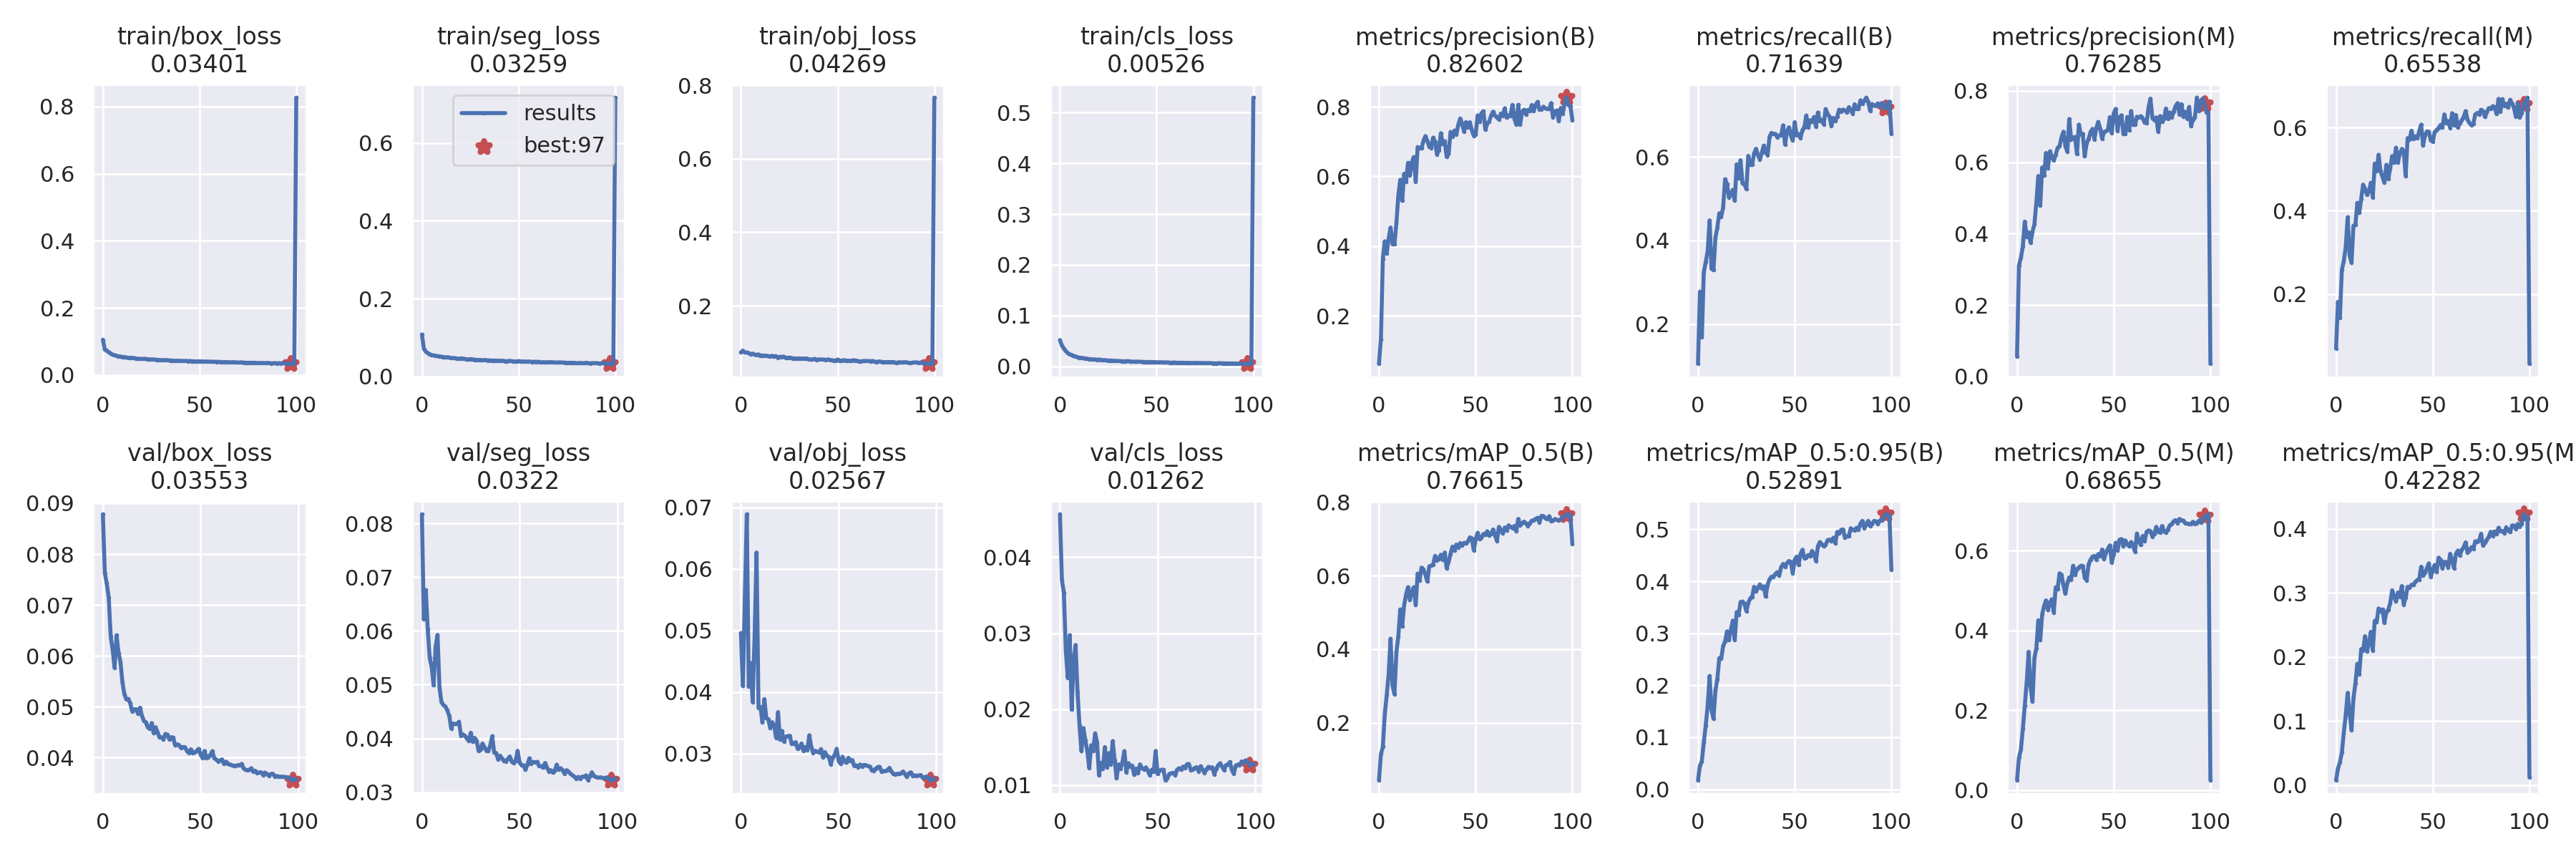

In [ ]:
%cd {HOME}/yolov5
!python segment/train.py --img 320 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt --name custom-dataset
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset/results.png', width=1200)

/content/drive/MyDrive/yolov5
segment/predict: weights=['/content/drive/MyDrive/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/drive/MyDrive/yolov5/Project_212-10/test/images/Bird_drop_1_jpg.rf.8b726666df423927358be8f09d42d056.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-362-ge8a30cf8 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7411907 parameters, 0 gradients, 25.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/yolov5/Project_212-10/test/images/Bird_drop_1_jpg.rf.8b72

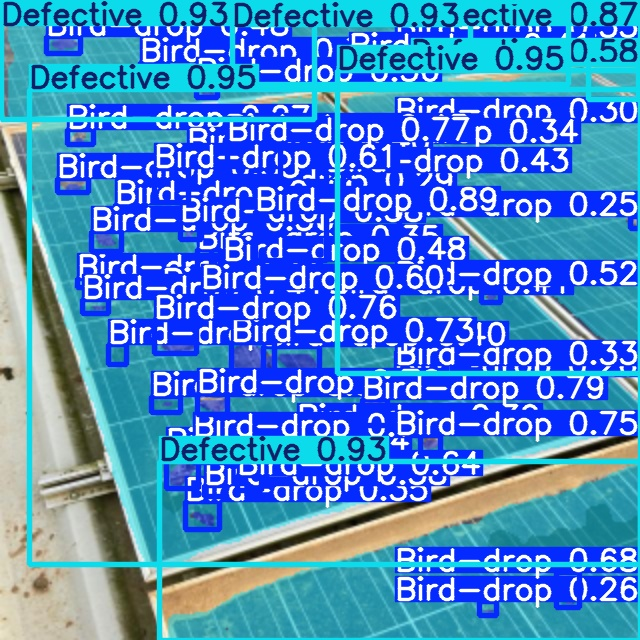

In [ ]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset/{example_image_name}", width=600)